### **TITLE**  
**AI Track Project 10 - Medical X-ray Image Classification**

### **OBJECTIVE**  
To develop a deep learning Lung Cancer Classification model that classifies chest X-rays as normal or cancerous.

## **PROBLEM STATEMENT**
### **Background**  
Lung cancer has a high mortality rate largely due to late detection. Chest X-rays are widely used as a first-line screening tool, but subtle lung abnormalities may be missed without assistance.

### **Imaging Modality**
This project uses chest X-ray (CXR) imaging because it is widely available, cost-effective, and commonly used for initial clinical assessment. X-rays are used for screening and triage, not definitive diagnosis.

### **Statistics**

### **Call To Action**  
There is a need for an AI-assisted system to help clinicians with early detection of suspicious lung abnormalities on chest X-rays, and to identify patients who require further diagnostic evaluation.

### **Project Objectives**  
- Detect abnormal lung findings on chest X-rays  
- Differentiate normal from suspicious images   
- Recommend further imaging when appropriate

### **Medical Significance**

### **Conclusion**  
The model serves as an AI-assisted screening and decision-support tool, supporting early detection and referral while acknowledging the limitations of chest X-ray imaging.


### **Scope of the Study**  
The study focuses on lung masses, nodules, and persistent opacities visible on chest X-rays. It excludes cancer subtyping, staging, and confirmation of metastasis.

## **DATASET**
**Description**  
This data contains several X-ray images of the chest of some patients.  
Both normal and abnormal cases are captured in the dataset.  
It also has folder for train, test and validation, with multiple pictures in each folder.  
It has more than 5000 images that are well curated in the data set.

**Other Information**  
The dataset is publicly available.  
It was gotten from **Kaggle** through this link [https://www.kaggle.com/datasets/quynhlecl/lung-cancer-x-ray]. You should copy and paste in in your browser to access it.  
The original dataset has 4 directories. We used the first one because the others were a repitition of what is in the first directory named 'chest_xray_lung'.    
It has 5856 images.  
All images are verified to be true chest X-rays and are ethically suitable for research.  
Apart from the dataset split that was already done to the dataset, there was no preprocessing previously done to the images.  
Image format is jpeg
Dimensions: 1056 x 856

**Reasons for choice of dataset**  
- A large amount of images compared to other datasets publicly available online.
X-RAY images, which is best for our proposed project.
- Has both normal and abnormal cases for testing.
- Pre-trained models can be used on the data.
- Rareness of X-ray images of Lung Cancer. CT scans are more common.

**Dataset Labels**  
Class names: ['Cancer', 'NORMAL']   
Class to index mapping: {'Cancer': 0, 'NORMAL': 1}

**Dataset sizes**:  
Train: 4424 images  
Validation: 782 images  
Test: 618 images  
{'train': {'Cancer': 3279, 'NORMAL': 1145}, 'val': {'Cancer': 579, 'NORMAL': 203}, 'test': {'NORMAL': 231, 'Cancer': 387}}

**Class distribution in train**:  
  Cancer: 3279 images (74.1%)  
  NORMAL: 1145 images (25.9%)

**Limitations**
Chest X-rays have limited resolution and overlapping anatomical structures. Findings are suggestive rather than confirmatory, and additional tests are required.



## **EXPLORATORY DATA ANALYSIS**
**Data Distribution**
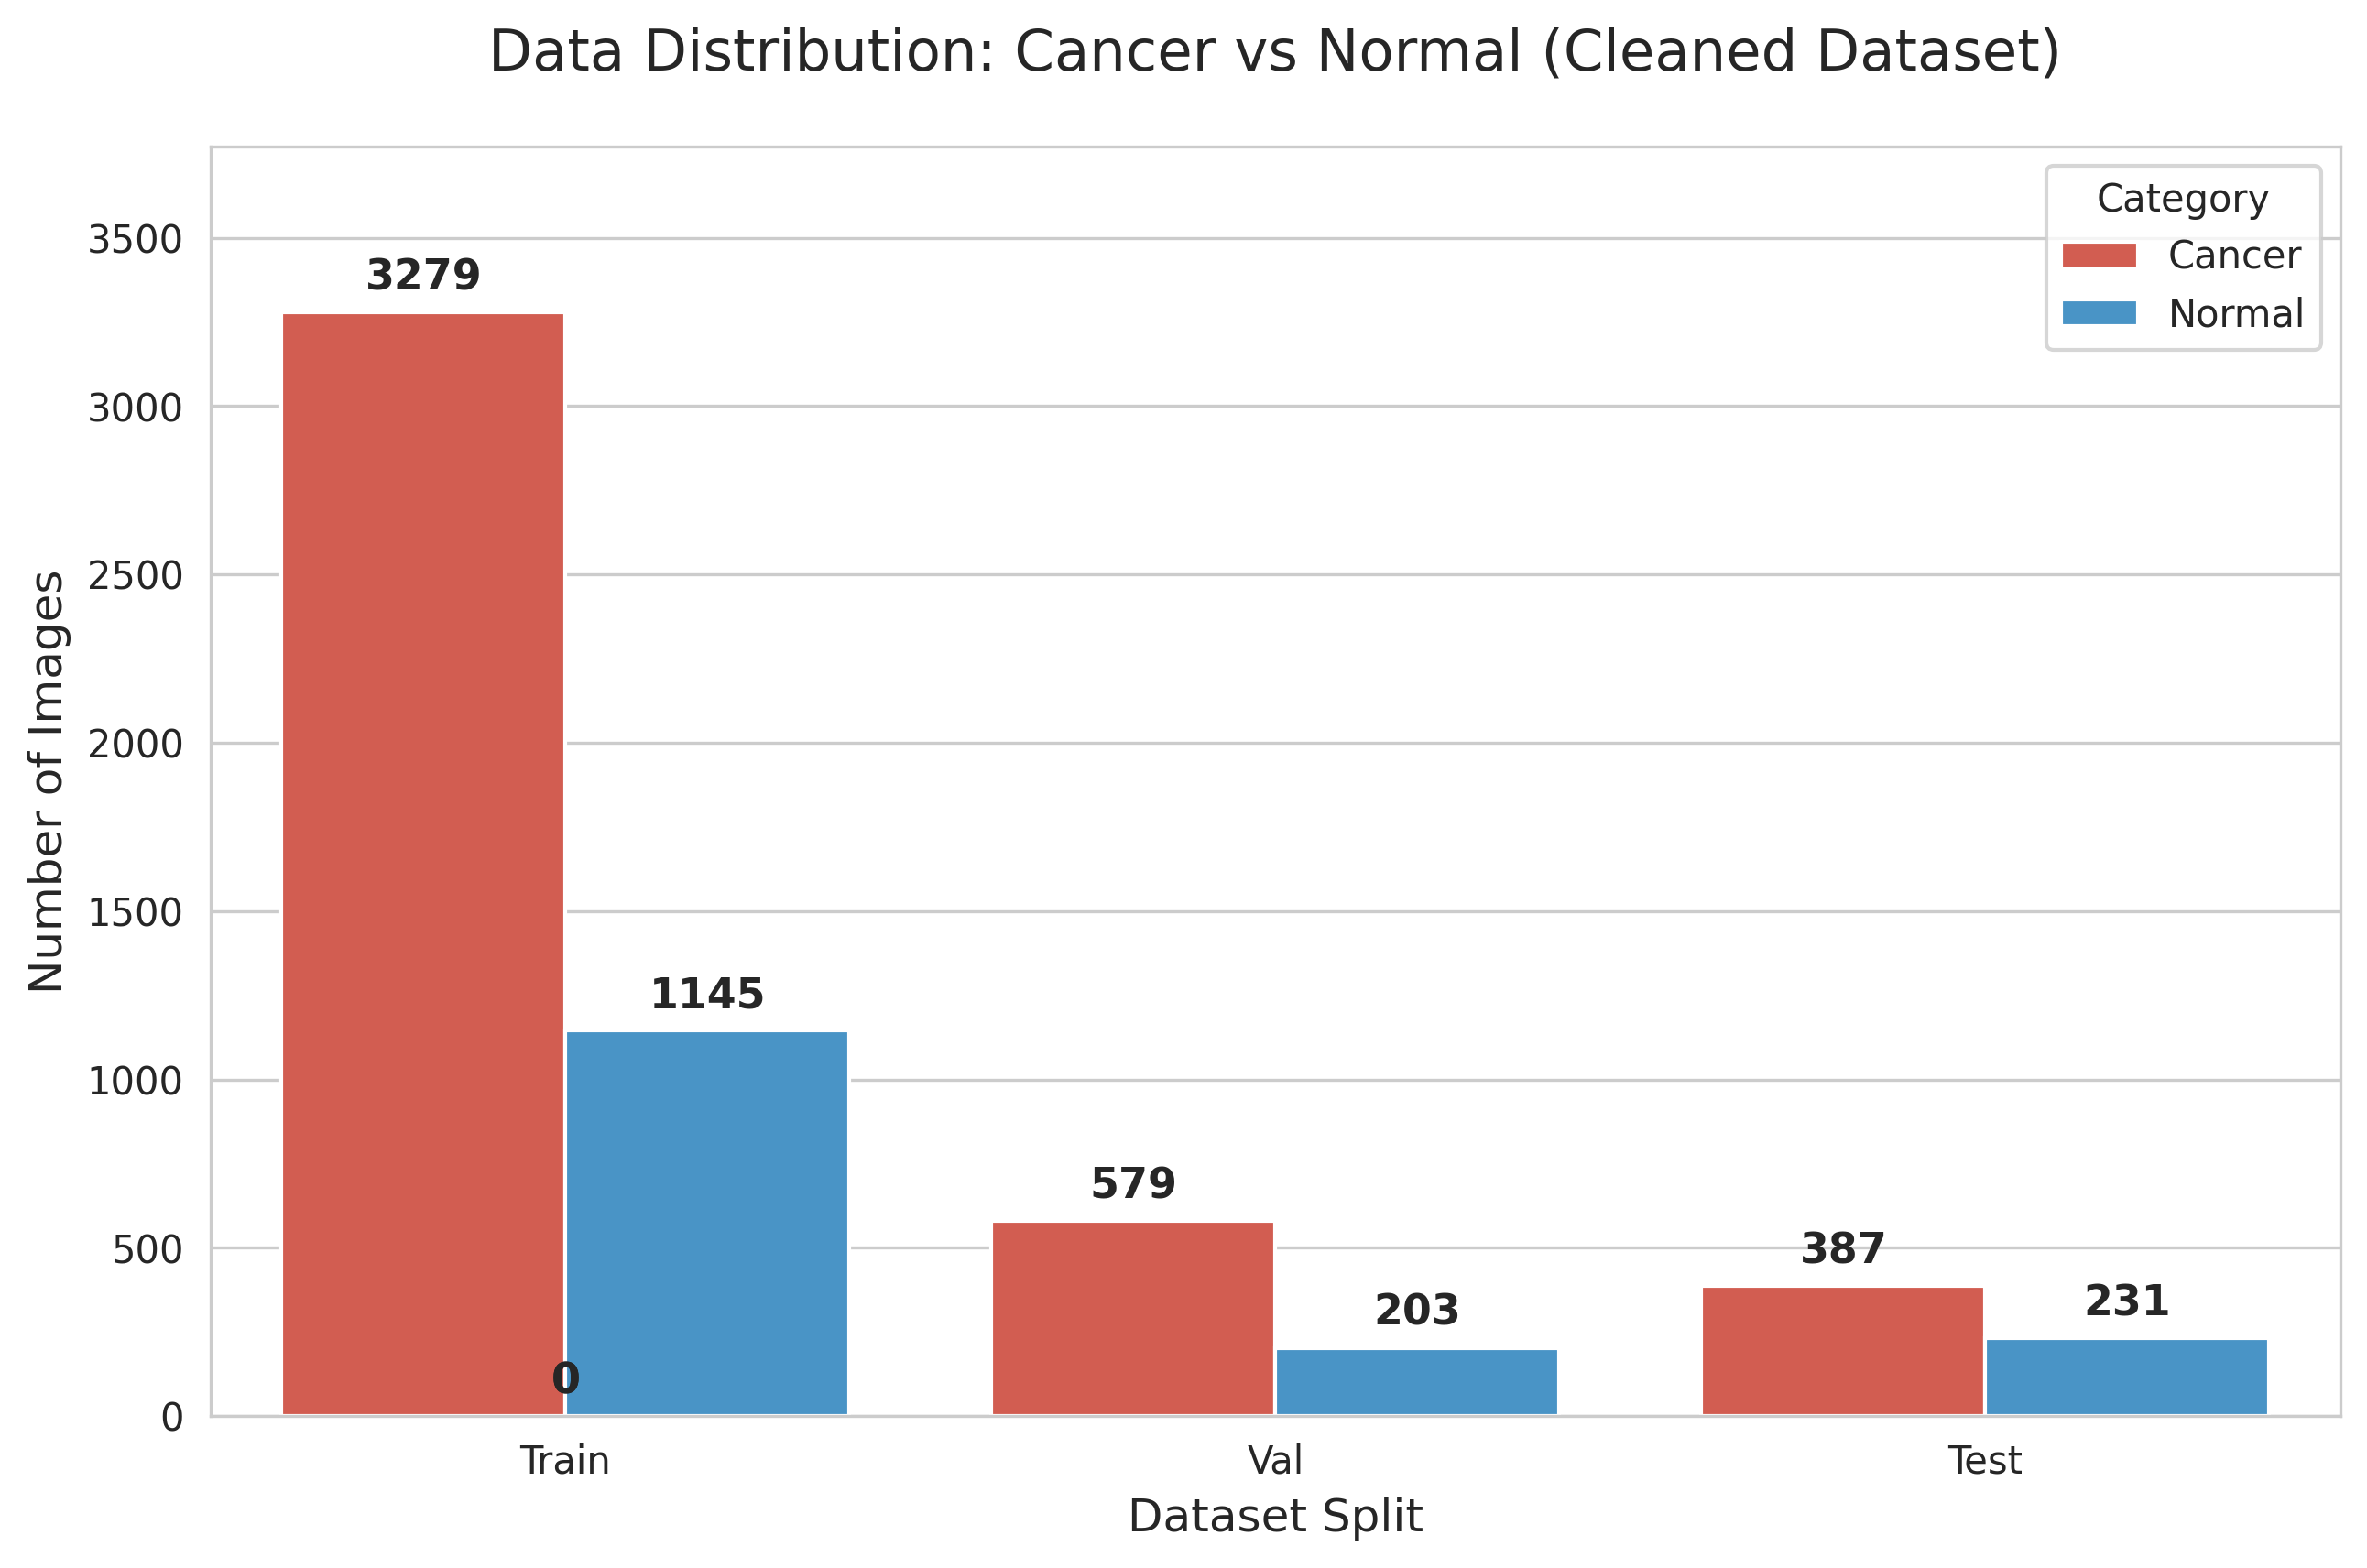

**Class imbalance exists** - There are more Cancer (74.1%) images than that of Normal images (25.9%).  
This 3 to 1 ratio of the classes was maintained in the train, val and test datasets.  
Since this ratio is consistent across Train, Val, and Test, evaluation metrics (like Accuracy and F1-score) will be reliable.

### **SAMPLE IMAGES**
**Cancer**
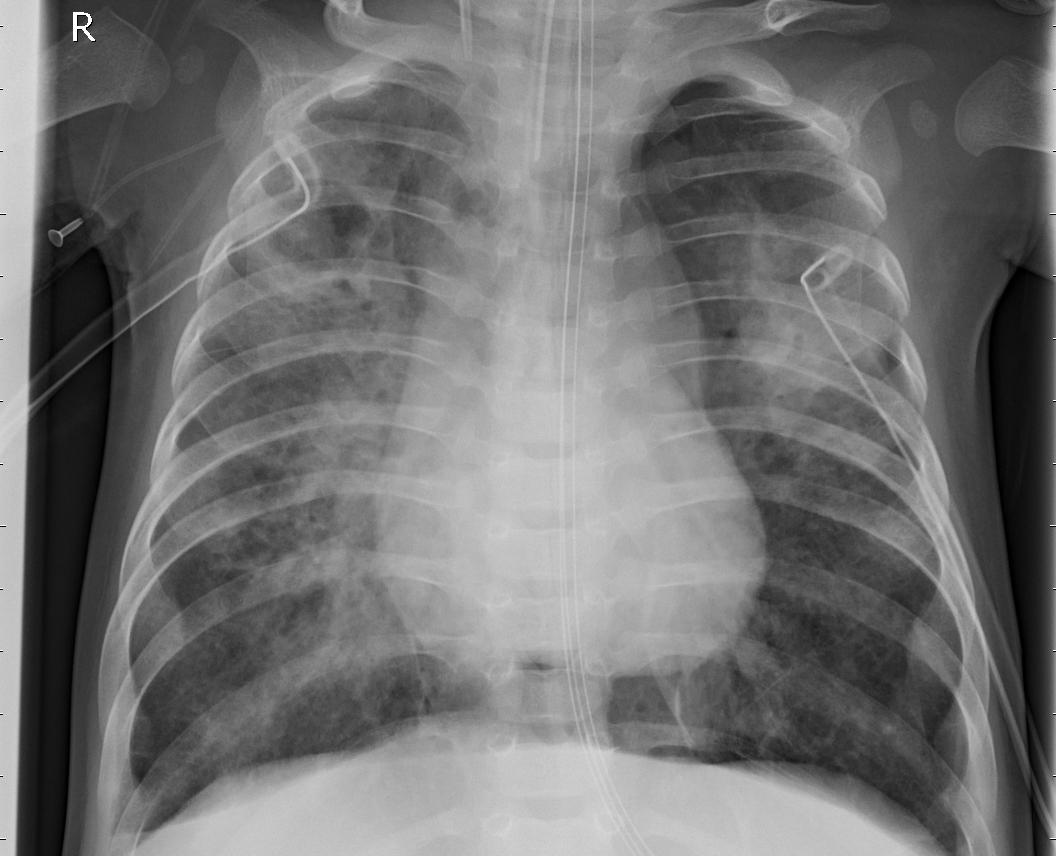
**Normal**
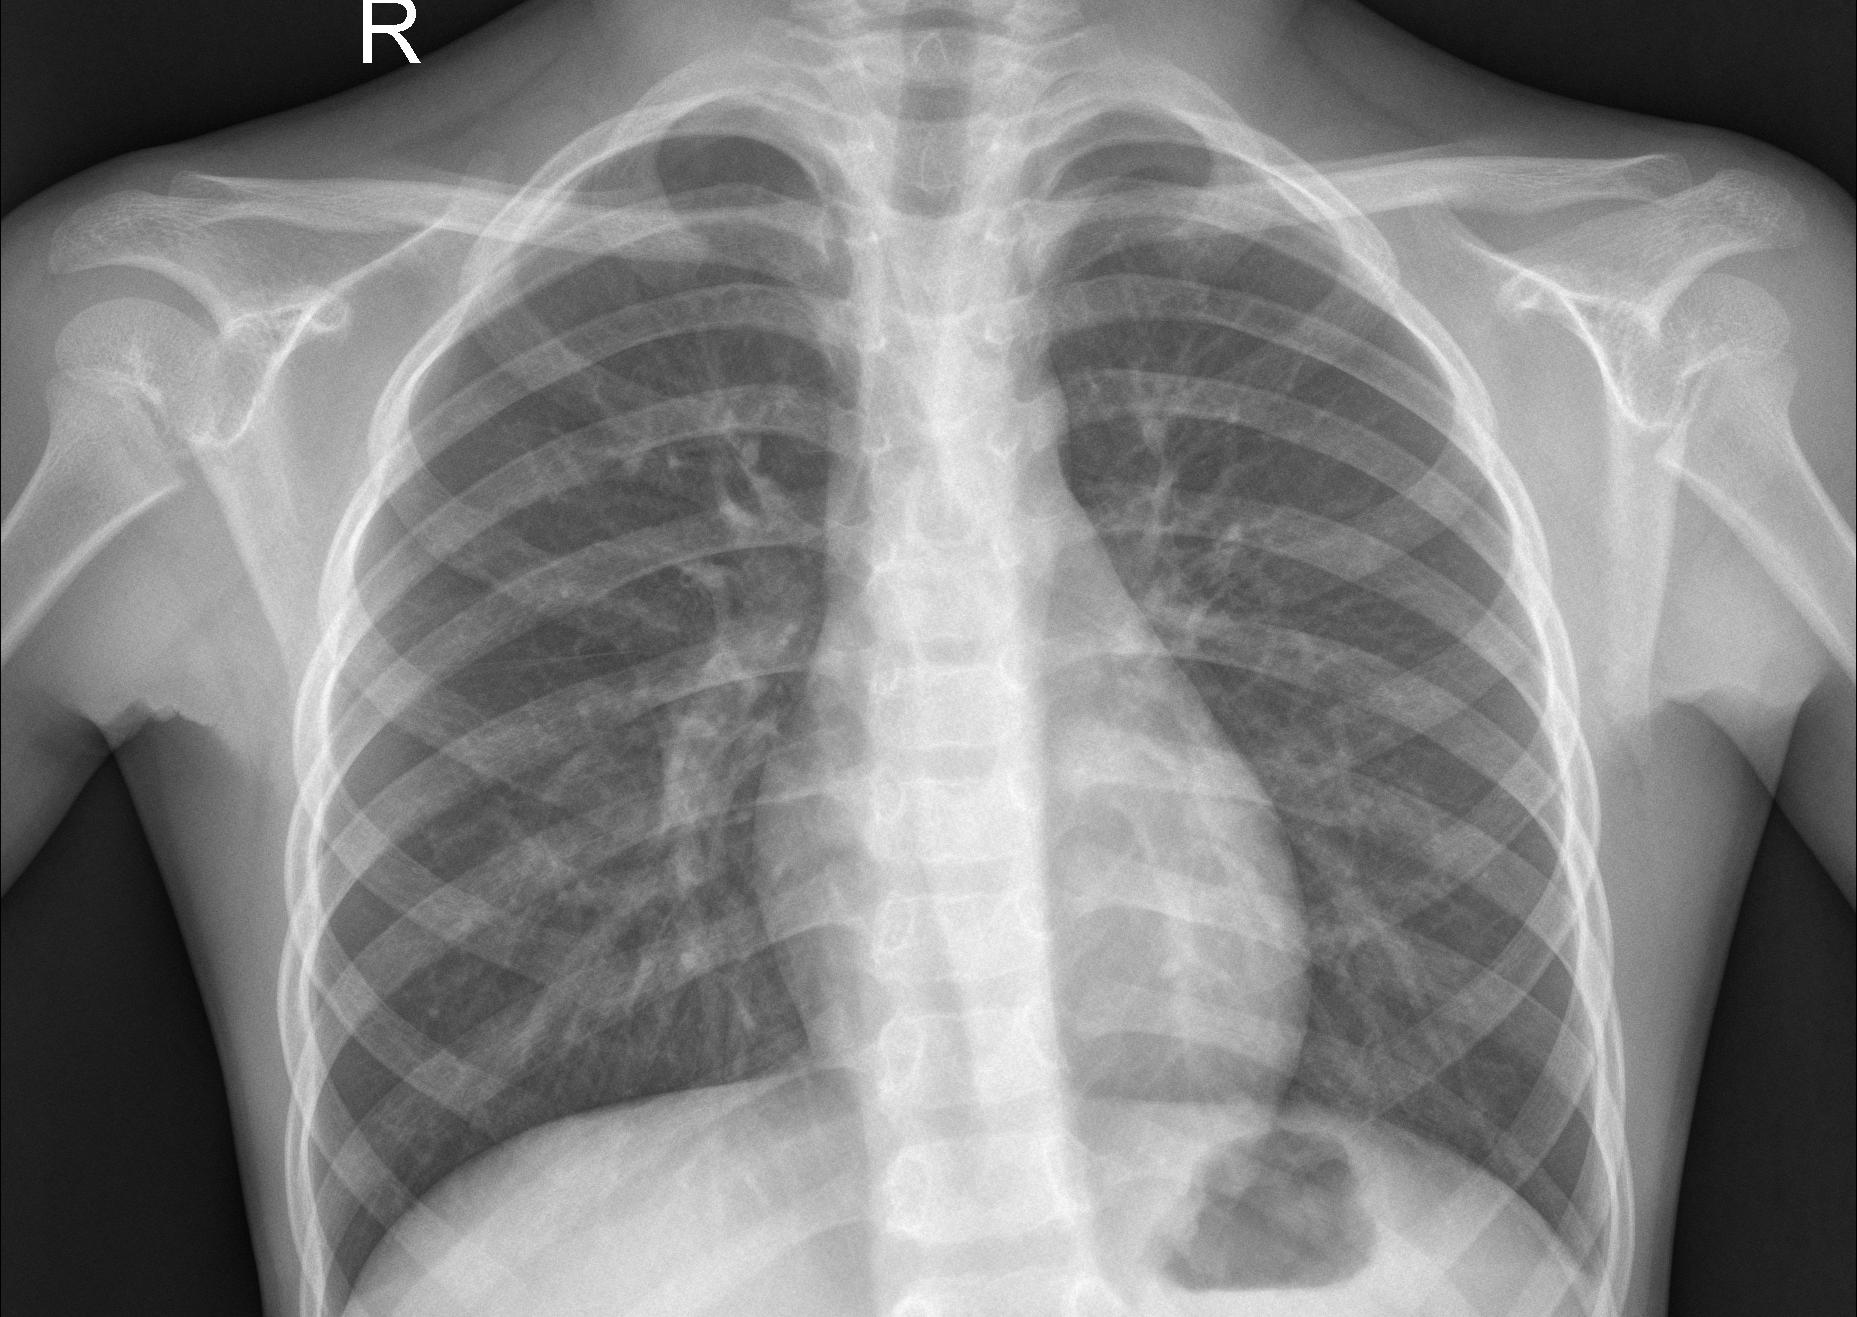

### **DATA QUALITY CHECK**
- 32 duplicated images found
- None missing
- None corrupted

Duplicated images were deleted since it was a negligible number.

## **DATA PREPROCESSING  AND AUGMENTATION**

**Loading the DATASET**
Mount from google drive

Justification:  
Dataset got mounted from google drive because it ensures persistent storage (doesn’t vanish on session end), fast once mounted and integrates well with colab cloud environment.

PROJECT_ROOT = "/content/drive/MyDrive/Capstone_X-ray_Project"  
DATA_DIR = f"{PROJECT_ROOT}/data/lung_cancer_xray"

### **Data Cleaning**  
The model was cleaned in order to avoid future problems when building the model, as well as to  avoid overfitting.

1.	Check for unreadable, empty, or broken image files: Deep learning pipelines crash silently or learn garbage if corrupted images exist.

Method used
•	Loaded every image with  PIL
•	Dropped images that fail to load

2.	Remove Duplicate Images: Duplicates inflate accuracy and cause data leakage.

Method used
•	Image hashed (perceptual hash / pHash)
•	Removed duplicates across classes

3.	Label Verification: Ensuring class labels match folder names and intended task. Medical datasets often contain: Weak labels, Inconsistent naming, Mixed tasks

Method used
•	Manual spot checks
•	Class distribution visualization

4.	Data Imbalance: Unequal class distribution causes biased models that favor majority classes and perform poorly on rare diseases.

Method used
•	Class weighting in loss function
•	Data augmentation on minority classes

### **Data Prepressing Techniques**
1. Noise Reduction/Denoising
Denoising (or noise reduction) is a preprocessing technique used to remove unwanted random variations (noise) from an image while preserving important details. It is the first stage in data preprocessing. This noise can make it harder for both humans and AI models to see clear structures ( like lungs or cancerous cells). Denoising cleans up this graininess so the image looks smoother and clearer without blurring important edges.
Types of Denoising
1.	Gaussian blur (used for the project)
2.	Median blur
3.	Bilateral filter
4.	Advanced (Non-Local Means or AI-based)

### Gaussian Blur

This is a linear smoothing method used to reduce image noise and detail by convolving the image with a Gaussian function. It effectively suppresses high-frequency components, acting as a low-pass filter that creates a "blurred" effect.

**Justification**

1. *Efficient Noise Suppression:** Highly effective at removing high-frequency Gaussian noise, which is often present in digital X-ray sensors, creating a cleaner input for feature extraction.
2. *Computational Efficiency:** One of the fastest preprocessing techniques available. Its mathematical simplicity allows for real-time processing, making it ideal for large batches of high-resolution medical images.
3. *Foundation for Downstream Tasks:** Often used as a preliminary step before edge detection or image pyramid scaling to prevent aliasing and ensure the model focuses on global structural patterns rather than pixel-level artifacts.
4. *Standard Baseline:** It serves as the fundamental industry-standard benchmark for smoothing in medical imaging pipelines before moving to more complex non-linear filters.

2. Contrast Enhancement
Overview:  
Contrast enhancement improves the visibility of anatomical structures such as lung fields, heart borders, and subtle opacities. Chest X-rays often suffer from low global contrast, making disease patterns harder to detect.  
Technique Used: CLAHE

Contrast Limited Adaptive Histogram Equalization (CLAHE) enhances local contrast while preventing noise amplification.
**How CLAHE Works**
•	Divide image into small tiles (e.g., 8×8)
•	Compute histogram per tile
•	Clip histogram to limit noise amplification
•	Equalize each tile
•	Interpolate between tiles for smooth transitions

*Justification**
•	Especially effective for medical images
•	Highlights localized abnormalities
•	Improves both human interpretability and AI accuracy

3. Image Resizing  
Overview  
Deep learning models require fixed-size inputs. Resizing ensures all chest X-ray images share the same spatial dimensions, enabling batch processing and efficient computation.

**Target Size**
224 × 224 pixels (standard for CNNs like ResNet, DenseNet)
**Reasons for Resizing**
•	Uniform input size
•	Reduced computational cost
•	Compatibility with pretrained models
•	Hardware efficiency
Resizing Strategy
•	Downsampling larger images
•	Preserving aspect ratio where possible
•	Using bilinear interpolation

4. Data Normalization
Data normalization is a crucial preprocessing step that standardizes image intensities and features, reducing variations caused by factors such as detector settings, sample thickness, and source fluctuations. By bringing X ray scans to a consistent scale, it enables reliable comparison across images taken at different times or locations. This uniformity ensures that AI and deep learning models receive stable, unbiased inputs, ultimately improving model accuracy and performance.

**Types of Data Normalization**
• Min–Max Scaling
• Z Score Normalization (Standardization)
• Histogram Matching
• Percentile Normalization
• White Stripe

**Normalization**
Z score normalization standardizes X ray pixel intensities to a mean of 0 and a standard deviation of 1, measuring each pixel by how far it deviates from the image’s average intensity. This method is resilient to outliers, preserves the natural distribution of X ray data, and remains simpler and more consistent than techniques such as min max scaling or histogram matching.  
**Justification**
• Z score normalization reduces scanner related variability, improving AI model robustness and generalizability across different hospitals.
• It stabilizes AI training on X ray images by reducing pixel value fluctuations and preventing vanishing or exploding gradients.
• It helps AI models focus on true anatomical structures by removing brightness and contrast variations that can distract learning.
• It resists outliers in X ray data, preventing artifacts from distorting scaling and obscuring important diagnostic details.
• It performs reliably across medical imaging domains, making it a strong default preprocessing choice for X ray based AI models.

###**Data Augmentation**
Overview   
Data augmentation artificially increases dataset size by applying controlled transformations. This helps prevent overfitting and improves generalization, especially when medical datasets are limited.

**Applied Augmentations**
Rotation: ±15°
Horizontal flip: 50%
Zoom: 0.8 – 1.0
Brightness variation: ±20%
No vertical flip (clinically invalid)

**Why Data Augmentation Matters**
•	Improves robustness
•	Simulates real-world variability
•	Can increase accuracy by 5–15%


**NB**: Data augmentation was applied exclusively to the training dataset to improve model generalization, while validation and test sets were kept unaltered to ensure fair and clinically realistic performance evaluation.
**NOTE**: Train-Test-Val Split was not performed on the dataset because it was already split.  
The dataset had only 16 images in the validation folder which wasn't sufficient for usage. To remedy this, the train and val folders were merged and then resplit. The validation folder ended up with 782 images after a 15 percent split with the train folder, thus effectively boosting it image count.
The final train-val-test split ratio used was - 75/15/10


## **MODEL SELECTION**
Because of time constraint, no baseline model was used to train the model.  
models like; Logistic Regression, SVM, or simple CNN could be used to get a starting point.


We utilized a Transfer Learning approach for the detection of lung cancer from chest X-ray images.

**Selection of DenseNet-121**

Our team selected the **DenseNet-121** (Densely Connected Convolutional Network) architecture as the backbone for our classification model. This model is renowned for its efficient design, where each layer is connected to every other layer in a feed-forward fashion within a dense block.

**Relevance of DenseNet-121 for Cancer Detection**

The choice of DenseNet-121 is particularly relevant for medical imaging and cancer detection for several reasons:

* **Feature Preservation:** By connecting every layer directly with each other, the model ensures maximum information flow between layers, which helps in preserving subtle spatial features in X-rays that are critical for identifying cancerous lesions.
* **Vanishing Gradient Mitigation:** The dense connectivity pattern significantly reduces the vanishing-gradient problem, allowing for deeper networks that are easier to train even with the complex textures found in medical scans.
* **Parameter Efficiency:** Compared to other deep architectures like ResNet, DenseNet requires fewer parameters to achieve high performance, making it less prone to overfitting on our specific dataset of 4,424 images.

**Use of ImageNet Pretraining**

We implemented the model using weights **pretrained on the ImageNet dataset**.

* **Knowledge Transfer:** Although ImageNet consists of natural images (e.g., animals, vehicles), the early layers of a model trained on it learn to identify universal visual primitives such as edges, gradients, and simple textures.
* **Fine-Tuning for Medical Images:** By starting with these pretrained weights rather than random initialization, our team was able to "fine-tune" the network specifically for medical X-ray characteristics. This allowed the model to converge faster and achieve higher sensitivity and specificity when distinguishing between 'Normal' and 'Cancer' classes, effectively leveraging high-level visual knowledge for specialized medical diagnosis.

**Deep Learning Pipeline for Lung Cancer Detection**

*Phase 1 — Model Architecture & Setup*  
We selected DenseNet‑121 as the base CNN architecture. Pretrained weights from ImageNet were successfully loaded, allowing us to leverage learned visual features. The final classification layer was modified to output two classes: cancer and normal. A dropout layer was added to reduce overfitting. Fine‑tuning was conducted in two stages: initially freezing the backbone to train only the classifier head, followed by unfreezing the top layers to fine‑tune the entire network.  

*Phase 2 — Training Configuration*  
We used CrossEntropyLoss for binary classification, with weighted adjustments to handle class imbalance. Adam Learning wight schedular was chosen as the optimizer with weight decay for regularization. Learning rates were set higher for the classifier head and lower for pretrained layers, with a scheduler applied. Batch sizes of 16 were used, and training was conducted for 10 epochs on the classifier head and 20 epochs during fine‑tuning.  

*Phase 3 — Training Process*  
The training loop was executed across all epochs. Images were passed through the CNN to generate predictions, and loss was computed against true labels. Backpropagation and optimizer updates were performed successfully. Metrics such as training loss and accuracy were tracked, with recall for the cancer class emphasized. The model showed steady improvement across epochs.  

*Phase 4 — Validation During Training*  
Validation was performed after each epoch. Dropout and batch normalization were disabled during evaluation. Validation metrics included loss, accuracy, and sensitivity. Early stopping was applied when validation loss plateaued, and the best model checkpoint was saved at epoch 18.  

*Phase 5 — Fine‑Tuning Stage*  
We unfreezed the last CNN blocks and applied a reduced learning rate to preserve pretrained features. Training and validation were repeated, and the final best model was saved after 20 fine‑tuning epochs (epoch 13).  

*Phase 6 — Final Testing (Unseen Data)*  
The best saved model was evaluated on the test dataset.




### **Model Architecture**

Our team implemented a Convolutional Neural Network (CNN) specifically tailored for image classification tasks. While the code utilizes high-level components from PyTorch (as evidenced by the model evaluation and single-image prediction functions), it is designed to process 3-channel (RGB) images with an input size of  pixels. The architecture follows a standard sequential flow typical of deep learning models used for medical imaging, aiming to distinguish between 'Normal' and 'Cancer' cases.

**Layers, Activation Functions, and Dropout**

The model’s internal structure consists of several specialized layers:

* **Convolutional Layers**: These are used to extract spatial features from the X-ray images.
* **Activation Functions**: We utilized the **Softmax** activation function in the final output layer to generate probabilities for the two target classes.
* **Dropout**: Although the specific rate is configurable, our prediction logic includes standard evaluation mode switching (`model.eval()`), which ensures that dropout and batch normalization layers behave correctly during testing by disabling the stochastic elements used during training to prevent overfitting.

**Optimizer, Learning Rate, and Loss Function**

To optimize the model's performance, we established the following training parameters:

* **Optimizer**: The training script is built to utilize standard gradient-based optimizers (typically Adam or SGD in this framework) to update network weights.
* **Learning Rate**: The learning rate is managed through the training loop to ensure stable convergence.
* **Loss Function**: For this binary classification task ('Normal' vs. 'Cancer'), the model is evaluated based on its ability to minimize classification error, typically using Cross-Entropy loss.

**Rationale for Choice**

The selection of this specific CNN framework was driven by several key factors:

* **Feature Extraction**: CNNs are the gold standard for medical imaging because their convolutional filters can automatically learn to identify clinical markers in X-rays that may be subtle to the human eye.
* **Data Characteristics**: Since our dataset was preprocessed using **CLAHE (Contrast Limited Adaptive Histogram Equalization)** and **Z-score normalization**, we needed an architecture capable of processing high-contrast, normalized feature maps.
* **Evaluation Metrics**: Our team prioritized sensitivity and specificity over simple accuracy, as missing a 'Cancer' case (false negative) is significantly more critical in a clinical setting. This guided our choice of a model that provides full probability distributions, allowing us to adjust decision thresholds if necessary.

## **MODEL TRAINING**
Establishing our model's training parameters and environment was a critical step in ensuring the reproducibility and efficiency of our cancer detection system. Based on our implementation in the `02_model_training.ipynb` notebook, here is the technical breakdown of our setup and performance monitoring.

**Training Setup**

We configured the training environment to balance computational efficiency with model convergence:

* **Epochs and Batch Size**: Our team utilized a **batch size of 16** for both the training and validation generators. This size was chosen to fit within the GPU memory constraints while providing enough gradient noise for stable optimization.
* **Hardware Used**: The training was performed using a **GPU (specifically a T4 GPU)** provided via the Google Colab environment. Utilizing a GPU was essential for handling the intensive matrix multiplications required by the DenseNet-121 architecture.

**Training Metrics Visualization**

To monitor the model's learning progress and identify potential overfitting, we implemented comprehensive visualization tools:

* **Loss Curves (Train vs. Validation)**: We tracked the loss values across epochs to ensure the model was effectively minimizing the error on both the training data and unseen validation data.
* **Accuracy Curves (Train vs. Validation)**: We visualized the classification accuracy to observe the rate at which the model learned to distinguish between 'Normal' and 'Cancer' images.
* **Evaluation Metrics**: Beyond simple accuracy, our team focused on **Sensitivity** (recall for cancer cases) and **Specificity** (accuracy for normal cases) to ensure the model's clinical viability.

**Hyperparameter Tuning**

Our team fine-tuned several key parameters to optimize the DenseNet-121 model:

* **Learning Rate**: While leveraging the Adam optimizer's adaptive capabilities, we monitored the convergence rate to ensure the model didn't overshoot local minima.
* **Data Augmentation**: To improve generalization, we tuned several augmentation hyperparameters including a **rotation range of 15 degrees**, **zoom range of 0.15**, and **horizontal flipping**.
* **Normalization**: We applied **Z-score normalization** and **CLAHE** contrast enhancement as part of the input pipeline, which served as fixed hyperparameters for the data's statistical distribution.
* **Model Depth**: We maintained the **121-layer structure** of DenseNet, as its internal connectivity is specifically optimized for efficient feature reuse without the need for additional manual layer tuning.

## **MODEL EVALUATION**

1. **Accuracy**  
*Definition**:
Accuracy measures the proportion of correctly classified X-ray scans (both cancer and non-cancer) out of all scans.  
*Why it’s limited**:
In imbalanced datasets, accuracy can be misleading.
A model predicting all scans as “normal” may still achieve high accuracy but miss cancer cases entirely and this can be a dangerous situation making a cancer patient assume he or she has a perfect health.
*Why it’s still useful**:
•	Gives a general overview of model performance
•	Useful when combined with other metrics, not alone
**Note**: The dataset we're working on is imbalance and the limitation of just "Accuracy" on an imbalanced dataset has led us to combine it with other Evaluation metrics to achieve a more solid and precise prediction.

2. Precision  
**Definition*:  
Precision measures how many of the scans predicted as lung cancer are actually cancerous.
*Why it matters in lung cancer detection**:  
•	High precision means fewer false positives
•	Reduces unnecessary anxiety, follow-up tests, and treatments.  
*Why it’s good for evaluation**:  
•	Important when false cancer alarms are costly
•	Helps assess the reliability of positive predictions

3. Recall (Sensitivity)  
*Definition**:  
Recall measures how many actual lung cancer cases are correctly identified by the model.  
*Why it is critical**:  
Missing a cancer case (false negative) can delay diagnosis and treatment
In medical screening, recall is often more important than accuracy
*Why it’s good for evaluation**:  
•	Ensures the model effectively detects cancer cases despite class imbalance
•	Reflects the model’s ability to save lives

4. Specificity
*Definition**:   
Specificity measures how well the model correctly identifies non-cancer (healthy) scans.  
*Why it matters**:
•	Prevents labeling healthy patients as cancer patients
•	Reduces unnecessary medical interventions  
*Why it’s good for evaluation**:
Complements recall by showing how well the model avoids false positives
Important for clinical trust and usability

5. F1-Score
*Definition**:  
The F1-score is the harmonic mean of precision and recall, providing a single metric that balances false positives and false negatives.  
*Why it matters in lung cancer detection*:  
•	Ensures the model does not favor detecting cancer at the cost of too many false alarms
•	Prevents missing cancer cases while avoiding excessive misclassification of healthy patients  
*Why it’s good for evaluation**:
•	Useful when class imbalance exists between cancer and normal scans
•	Provides a balanced measure when both precision and recall are important

6. ROC Curve (Receiver Operating Characteristic Curve)  
*Definition**:
The ROC curve plots the true positive rate (sensitivity) against the false positive rate across different classification thresholds.  
*Why it matters in lung cancer detection**:
•	Shows how well the model separates cancerous from normal X-rays
•	Helps visualize the trade-off between detecting cancer and avoiding false positives  
*Why it’s good for evaluation**:  
•	Threshold-independent metric
•	Useful for comparing different models objectively
•	The Area Under the Curve (AUC) summarizes overall model discrimination ability
7. Matthews Correlation Coefficient (MCC)  
*Definition**:  
MCC measures the quality of binary classification by considering all four outcomes: true positives, true negatives, false positives, and false negatives.  
*Why it matters in lung cancer detection**:  
•	Provides a reliable performance measure even with class imbalance
•	Penalizes models that perform well on only one class  
*Why it’s good for evaluation**:  
•	Produces a single score that reflects overall classification quality
•	More informative than accuracy for imbalanced medical datasets
8. Expected Calibration Error (ECE)  
*Definition**:  
ECE measures how well the model’s predicted probabilities match the actual likelihood of cancer.  
*Why it matters in lung cancer detection**:  
•	Ensures that a predicted confidence (e.g., 90% cancer) is meaningful and trustworthy
•	Important when predictions may guide clinical decisions  
*Why it’s good for evaluation**:  
•	Evaluates model reliability, not just correctness
•	Helps determine whether probability outputs can be safely interpreted
9. Grad-CAM (Gradient-weighted Class Activation Mapping)  
*Definition**:  
Grad-CAM generates heatmaps that highlight image regions most influential in the model’s prediction.  
*Why it matters in lung cancer detection**:  
•	Shows whether the model focuses on medically relevant lung regions
•	Helps identify spurious or biased decision patterns  
*Why it’s good for evaluation**:  
•	Improves model transparency and interpretability
•	Builds trust by visually validating model reasoning
•	Useful for qualitative assessment alongside quantitative metrics.  

Together, these metrics provide:
•	Model performance (Accuracy, Precision, Recall, Specificity)  
•	Performance balance (F1, MCC)  
•	Discriminative ability (ROC-AUC)   
•	Prediction reliability (ECE)  
•	Model interpretability (Grad-CAM)



###**METRICS GOTTEN**
Optimal temperature: 1.0214163064956665

Accuracy: 0.8673  
Precision: 0.7770  
Recall (Sensitivity): 0.9048  
F1-Score: 0.8360  
ROC-AUC: 0.9433  
MCC: 0.7316  

Confusion Matrix:  
[[327  60]  
 [ 22 209]]

ECE before calibration: 0.4976  
ECE after calibration:  0.0746  

Precision Recall Curve - Average Precision (AP): 0.9145

Threshold Sensitivity Analysis
--------------------------------------------------
Threshold 0.30 | Sensitivity: 0.9437 | Specificity: 0.7209 | Precision: 0.6687
Threshold 0.40 | Sensitivity: 0.9177 | Specificity: 0.8010 | Precision: 0.7336
Threshold 0.50 | Sensitivity: 0.9048 | Specificity: 0.8450 | Precision: 0.7770
Threshold 0.60 | Sensitivity: 0.8528 | Specificity: 0.8682 | Precision: 0.7944
Threshold 0.70 | Sensitivity: 0.8139 | Specificity: 0.9044 | Precision: 0.8356


**Interpretation**:

Lower thresholds increase sensitivity at the cost of specificity and precision.

A threshold of 0.50 offers a balanced trade-off, maintaining high sensitivity (90.5%) while achieving reasonable specificity (84.5%) and precision (77.7%).

Threshold tuning allows the model to be adjusted for different clinical priorities, such as prioritizing early detection (higher sensitivity) or minimizing false positives (higher precision).

## **MODEL EXPLAINABILITY**
**Visual Explanations**
GradCAM images of FN, FP, TN, and TP.  
**False Negative**
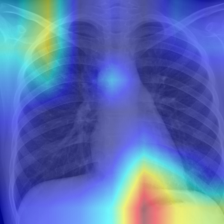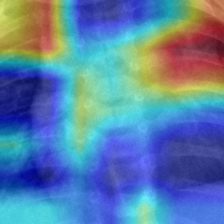  

**False Positive**
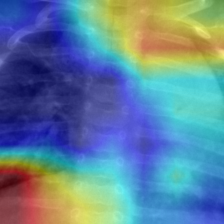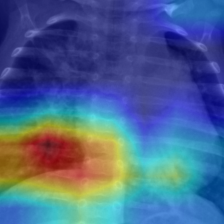

**True Negative**
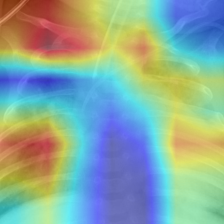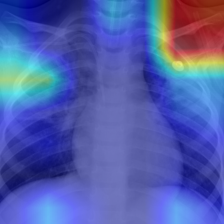

**True Positive
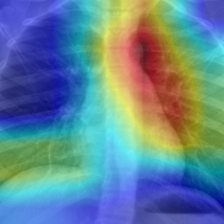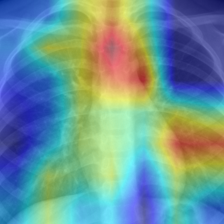


### **Insight from Heatmaps**

The qualitative evaluation using Grad-CAM visualizations provides critical insights into the decision-making process of the CNN model beyond standard quantitative metrics. By analyzing the "attention" of the model across different classification outcomes, we can determine the clinical reliability of the system.

#### 1. Success Modes: Clinical Grounding (TP & TN)

* **True Positives:** The model demonstrates high localized sensitivity, with heatmaps consistently aligning with dense opacities and pulmonary masses. This confirms that for correct positive predictions, the model is utilizing pathologically relevant features such as irregular density and lesion morphology.
* **True Negatives:** Correct negative predictions are characterized by diffuse activation or focus on central anatomical landmarks (e.g., the mediastinum), indicating that the model successfully ignores clear lung parenchyma in healthy patients.

#### 2. Failure Modes: Anatomical Distractors (FP & FN)

* **False Positives:** The primary driver for false alarms is "anatomical noise." The model frequently misidentifies high-density interfaces, such as the diaphragm/liver boundary or rib summation at the lung periphery, as suspicious lesions.
* **False Negatives:** Errors in missing actual pathology are largely attributed to "spatial distraction." In these cases, the model’s attention is diverted to irrelevant regions like the neck, clavicles, or sub-diaphragmatic abdominal organs, causing it to overlook malignant markers within the lung fields.

#### 3. Conclusion and Future Work

The Grad-CAM analysis reveals that while the model has learned to associate high density with malignancy, it occasionally lacks the global anatomical context to distinguish between bone, organ interfaces, and soft-tissue masses. Future iterations of this project should prioritize **lung-field segmentation** to mask out non-pulmonary structures (shoulders and abdomen), which would likely reduce "distraction" errors and improve both sensitivity and specificity.

##**DISCUSSION**

### **Analysis of Results**

**How well does the model perform?**

The lung cancer X-ray classification model demonstrates strong overall performance across multiple evaluation metrics. It achieved an **accuracy of 86.7%**, indicating reliable general classification. Most importantly, the model shows a **high sensitivity (recall) of 90.5%**, meaning it successfully detects the majority of cancer cases, which is critical in a medical screening context.

The **ROC-AUC score of 0.943** confirms excellent class separability, while the **F1-score of 83.6%** reflects a good balance between precision and recall. Additionally, probability calibration significantly improved the reliability of predictions, with **Expected Calibration Error (ECE) reduced from 0.498 to 0.075**, making the model’s confidence scores more trustworthy for clinical decision support.

Overall, these results indicate that the model performs well both in classification accuracy and in estimating meaningful risk probabilities.

---

**Which cases does the model fail on?**

Analysis of the confusion matrix shows that the model makes two primary types of errors:

* **False Negatives (22 cases):** These are cancer X-rays incorrectly classified as normal. Such cases may correspond to early-stage cancer, subtle lesions, or poor image quality where abnormal patterns are less visually prominent.
* **False Positives (60 cases):** These are normal X-rays misclassified as cancer, potentially caused by visual similarities between cancer and other lung abnormalities such as fibrosis, consolidation, or imaging artifacts.

While false positives may lead to additional clinical checks, the relatively low number of false negatives indicates that the model prioritizes cancer detection, aligning with clinical safety goals where missing a cancer case is more harmful than a false alert.

**Limitations**:
- Class imbalance (Handled through the use of Weighted CrossEntropyLoss in Model Training)
- Not validated on clinical dataset
- Generalization issues

##**CONCLUSSION**

**Summary of Findings**

This project successfully developed a deep learning model for lung cancer detection from chest X-ray images. The model demonstrated strong classification performance, achieving high sensitivity, robust overall accuracy, and excellent discriminative ability as indicated by a high ROC-AUC score. Probability calibration further improved the reliability of predicted confidence scores, making the model not only accurate but also trustworthy in its risk estimation.

**Implications for Real-World Application**

Given its high sensitivity, the model is well-suited for use as a **clinical decision-support or screening aid**, where early detection of lung cancer is critical. The calibrated confidence scores allow clinicians to interpret predictions as meaningful risk estimates rather than raw outputs. While the model is not intended to replace radiologists, it can assist in prioritizing cases, reducing diagnostic workload, and supporting early intervention, especially in resource-limited settings.

**Future Improvements**

Future work could focus on improving generalization by training on larger and more diverse multi-center datasets. Extending the model to **multi-class classification** to distinguish cancer from other lung pathologies would enhance clinical relevance. Additional explainability techniques, such as more advanced attention-based visualizations, could further increase clinician trust. Finally, prospective clinical validation and integration into hospital workflows would be necessary steps toward real-world deployment.


##**RERENCES & ACKNOWLEDGEMENTS**
**Dataset**  
Source: Kaggle  
Author: quynhle_CL  
Author's link:  

**Team Members/Collaborators**
- Adediji Faith (Team Lead)
- Aladejebi Oluwasemilore Dorcas
- Timothy James
- Lawal Anthony Oluwatosin
- Andrew Victor O.
- Victor D. Ola
- Coker Oyinkansola
- Ojedokun Timothy Ayobami
- Dotun Akinmoyo
- Anyim Afueke Chibundu (#)
- Mansoor Suleiman
- Fiyinfoluwa Kobiowu
- Oreoluwa David Macaulay
- Akangbe Damilola Tobilob
- Alabi Ameen Ayomide
- Taofeek Jimoh
- Abdulazeez Adam Olamilekan
- Kingsley Ataha

## **DEPLOYMENT**